In [1]:
#import necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [2]:
#Load the dataset
data_train = pd.read_excel(r"C:\Users\Sidra Khan\Downloads\Data_Train (2).xlsx")
pd.set_option('display.max_columns', None)


In [3]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#value counts for duration
data_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
data_train.dropna(inplace=True)

In [7]:
#To check the null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#To extract month and day on date_of_journey columns
data_train['Journey day'] = pd.to_datetime(data_train.Date_of_Journey, format= "%d/%m/%Y").dt.day
data_train['Journey month'] = pd.to_datetime(data_train.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [9]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey day,Journey month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
#drop date_of_journey column as we already have it
data_train.drop(["Date_of_Journey"], axis=1, inplace=True)


In [11]:
#To extract hour and min on Dep_Time column
data_train['Dep_hour'] = pd.to_datetime(data_train.Dep_Time).dt.hour
data_train['Dep_min'] = pd.to_datetime(data_train.Dep_Time).dt.minute

In [12]:
#drop Dep_Time column as we already have it
data_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [13]:
#to extract hour and minute from Arrival_Time column
data_train['Arrival_hour'] = pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train['Arrival_min'] = pd.to_datetime(data_train.Arrival_Time).dt.minute

In [14]:
#drop Arrival_Time
data_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [15]:

# Assigning and converting Duration column into list
duration = list(data_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [16]:
data_train['Duration_Hours'] = duration_hours
data_train['Duration_min'] = duration_mins

In [17]:
#Drop Duration column
data_train.drop(['Duration'], axis = 1, inplace= True)

In [18]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey day,Journey month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey day      10682 non-null  int64 
 8   Journey month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_Hours   10682 non-null  int64 
 14  Duration_min     10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [75]:
data_train.columnsns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey day', 'Journey month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_Hours', 'Duration_min'],
      dtype='object')

Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case


In [101]:
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox

In [102]:
train_data["Price_wins"] = winsorize(train_data["Price"], limits = 0.01) 


In [104]:
train_data["Price_log"], param_1 = boxcox(train_data["Price_wins"]) # param_1 will be used for inverse transformation

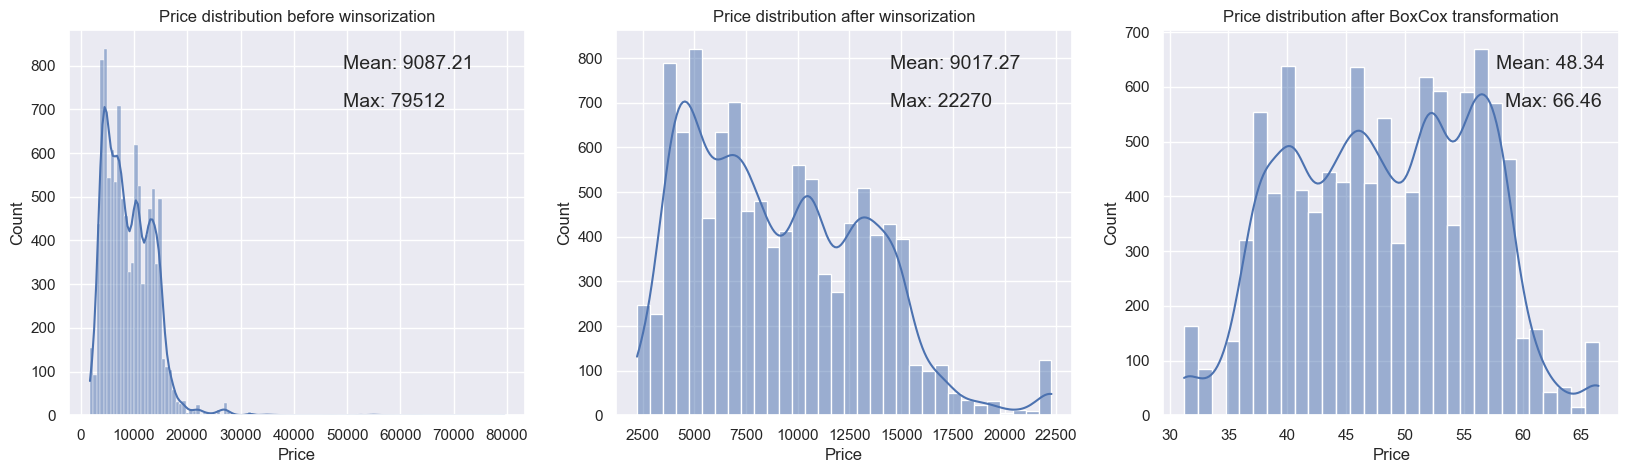

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(x=train_data["Price"], kde=True, ax=axes[0])
sns.histplot(x=train_data["Price_wins"], kde=True, ax=axes[1])
sns.histplot(x=train_data["Price_log"], kde=True, ax=axes[2])
axes[0].set_title("Price distribution before winsorization")
axes[0].set_xlabel("Price")
axes[0].text(0.6, 0.9, f'Mean: {np.round(train_data["Price"].mean(), 2)}',  
        fontsize = 14,
        transform = axes[0].transAxes)
axes[0].text(0.6, 0.8, f'Max: {np.round(train_data["Price"].max(), 2)}',  
        fontsize = 14,
        transform = axes[0].transAxes)
axes[1].set_title("Price distribution after winsorization")
axes[1].set_xlabel("Price")
axes[1].text(0.6, 0.9, f'Mean: {np.round(train_data["Price_wins"].mean(), 2)}',  fontsize = 14,
        transform = axes[1].transAxes)
axes[1].text(0.6, 0.8, f'Max: {np.round(train_data["Price_wins"].max(), 2)}',  
        fontsize = 14,
        transform = axes[1].transAxes)
axes[2].set_title("Price distribution after BoxCox transformation")
axes[2].set_xlabel("Price")
axes[2].text(0.73, 0.9, f'Mean: {np.round(train_data["Price_log"].mean(), 2)}',  
        fontsize = 14,
        transform = axes[2].transAxes)
axes[2].text(0.75, 0.8, f'Max: {np.round(train_data["Price_log"].max(), 2)}',  
        fontsize = 14,
        transform = axes[2].transAxes)
plt.show()


In [20]:
#value count for Airline column
data_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

The list shows the number of flights operated by different airlines. Here are a few interpretations:

Jet Airways operated the highest number of flights, with a total of 3849.
IndiGo and Air India operated a significant number of flights as well, with 2053 and 1751 flights respectively.
Multiple carriers also operated a considerable number of flights, with 1196 flights.
SpiceJet, Vistara, and Air Asia operated fewer flights compared to the top airlines, with 818, 479, and 319 flights respectively.
GoAir, Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy, and Trujet operated the lowest number of flights.

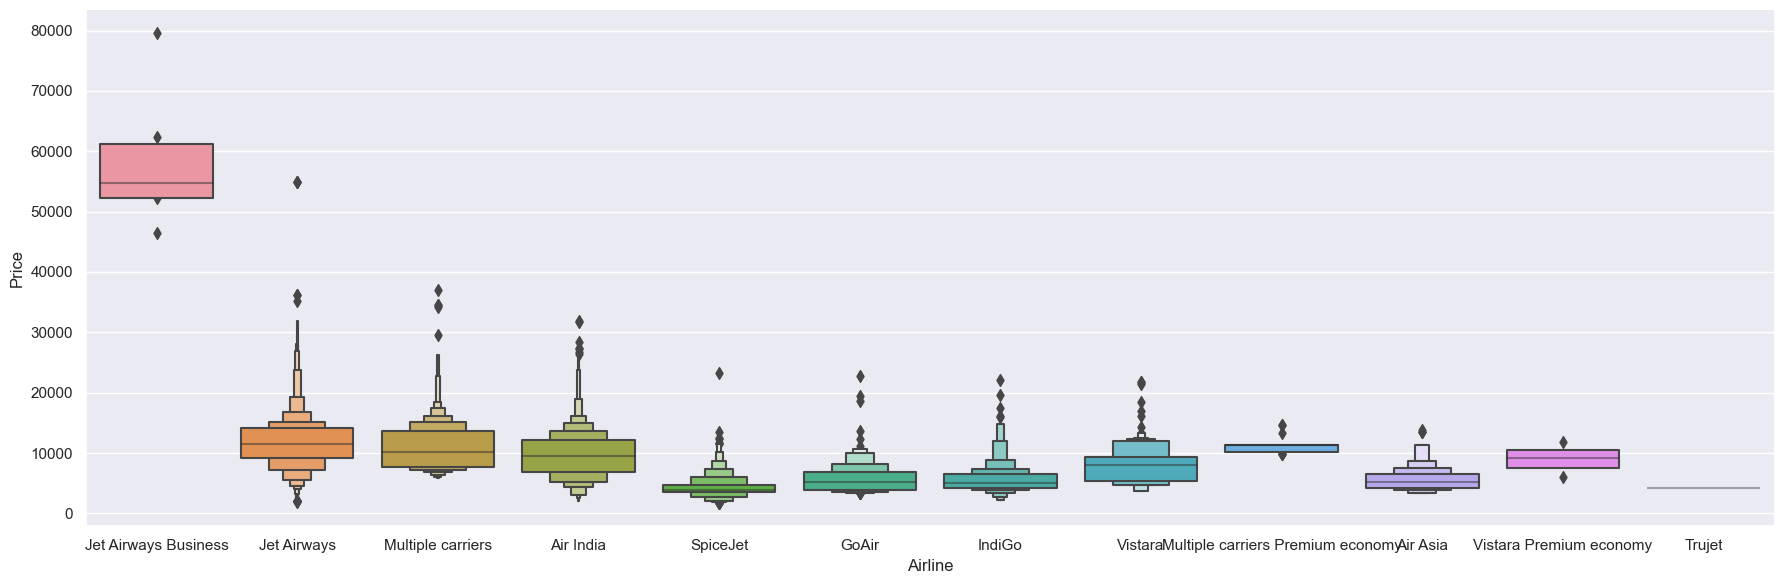

In [21]:
sns.catplot(x = "Airline", y = "Price", data = data_train.sort_values("Price", ascending=False), kind = "boxen", height = 6, aspect = 3)
plt.show()

The median ticket price for most airlines is around 10,000 to 20,000 units (currency or any other unit used for price).
Jet Airways and Air India have the highest median ticket prices, while IndiGo has the lowest.
The prices for Jet Airways, Air India, and Vistara have a wider range compared to other airlines, indicating that they have higher-priced tickets.
Multiple Carriers and Multiple Carriers Premium Economy have a wide range of prices, indicating that they offer both premium and low-cost options.
There are a few outliers, i.e., data points that lie outside the whiskers, indicating that there are some very high-priced tickets available for some airlines.




In [22]:
Airline = data_train['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
data_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

This code counts the number of flights departing from each city of origin in the dataset, sorted in descending order of frequency. This information can be useful for understanding demand for flights from different cities and making decisions about airline operations and pricing strategies. 




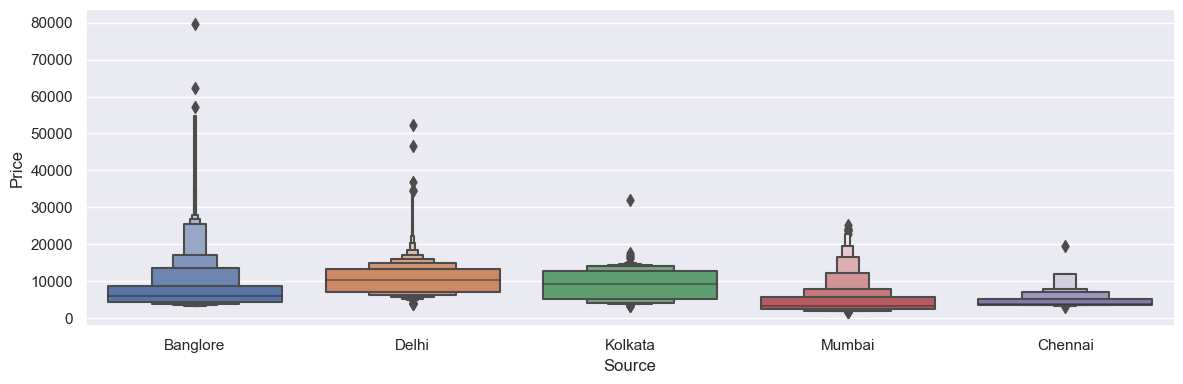

In [24]:
sns.catplot(x = 'Source', y = 'Price', data = data_train.sort_values("Price" , ascending=False), kind = 'boxen', height = 4, aspect = 3)

plt.show()

This code generates a boxen plot that shows the distribution of flight prices across different cities of origin in the dataset. The x-axis shows the city of origin ('Source') and the y-axis shows the price of the flight. The boxes represent the interquartile range (IQR) of the price distribution, while the whiskers extend to the maximum and minimum values within 1.5 times the IQR. Outliers are plotted as individual points. This plot can be useful for identifying price variations across different cities of origin and for detecting potential outliers or anomalies in the data.




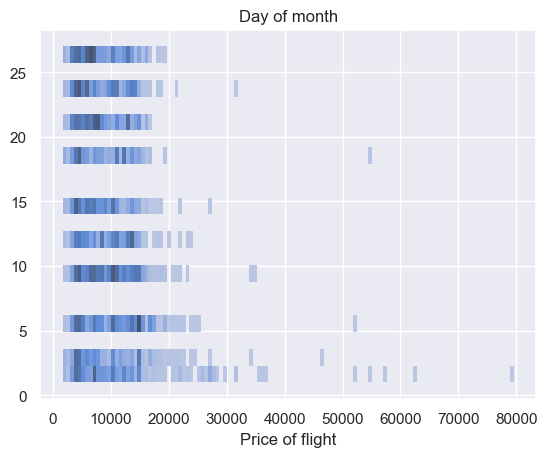

In [26]:
plt.figure()
pl = sns.histplot(x=data_train["Price"], y=data_train["Journey day"])
pl.set_title("Day of month")
pl.set_xlabel("Price of flight")
pl.set_ylabel(None)
plt.show()


There's more expensive flights in a first week of month.



<Figure size 640x480 with 0 Axes>

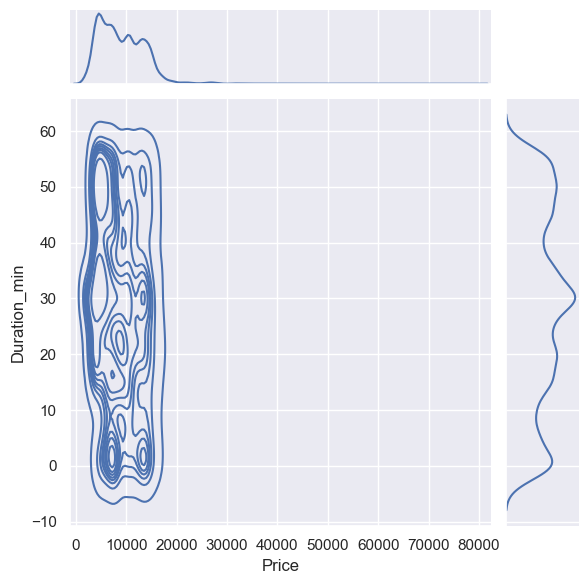

In [28]:
plt.figure()
pl = sns.jointplot(x = data_train['Price'], y = data_train['Duration_min'], kind = "kde")
plt.show()


In [29]:
Source = data_train['Source']
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
data_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
Destination = data_train['Destination']
Destination = pd.get_dummies(Destination, drop_first=True )
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
data_train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [33]:
data_train.drop(['Additional_Info', 'Route'], axis = 1, inplace=True)

In [34]:
data_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

The number of flights with each specific number of stops, ranging from non-stop flights to those with several stops.

In [35]:
data_train['Total_Stops'] = data_train['Total_Stops'].map({'1 stop': 0, 'non-stop':1, '2 stops': 2, '3 stops': 3, '4 stops':4})

In [36]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey day,Journey month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_min
0,IndiGo,Banglore,New Delhi,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,0,13302,1,3,16,50,21,35,4,45


In [37]:
train_data = pd.concat([data_train, Airline, Source, Destination], axis=1)

In [38]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey day,Journey month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,1,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace=True)

In [40]:
train_data.head()

,Total_Stops,Price,Journey day,Journey month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
train_data.shape

(10682, 30)

In [42]:
data_test = pd.read_excel(r"C:\Users\Sidra Khan\Downloads\Test_set (2).xlsx")

In [43]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [44]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
print("Test data Info")
print("-"*75)
print(data_test.info())

print()
print()

print("Null values :")
print("-"*75)
data_test.dropna(inplace = True)
print(data_test.isnull().sum())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [46]:
data_test['Day Journey'] = pd.to_datetime(data_test.Date_of_Journey, format = '%d/%m/%Y').dt.day
data_test['Month Journey'] = pd.to_datetime(data_test.Date_of_Journey, format = '%d/%m/%Y').dt.month
data_test['Dep hour'] = pd.to_datetime(data_test.Dep_Time).dt.hour
data_test['Dep min'] = pd.to_datetime(data_test.Dep_Time).dt.minute
data_test['Arrival hour'] = pd.to_datetime(data_test.Arrival_Time).dt.hour
data_test['Arrival min'] = pd.to_datetime(data_test.Arrival_Time).dt.minute
data_test.drop(['Date_of_Journey'], axis= 1, inplace=True)
data_test.drop(['Dep_Time'], axis = 1, inplace= True)
data_test.drop(['Arrival_Time'], axis = 1, inplace = True)


In [47]:
duration = list(data_test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] 
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding Duration column to test set
data_test["Duration_hours"] = duration_hours
data_test["Duration_mins"] = duration_mins
data_test.drop(["Duration"], axis = 1, inplace = True)



In [48]:
data_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day Journey,Month Journey,Dep hour,Dep min,Arrival hour,Arrival min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [49]:
data_test.drop(["Additional_Info", "Route"], axis=1, inplace=True)

In [50]:
Airline = pd.get_dummies(data= data_test['Airline'], drop_first=True)
Source = pd.get_dummies(data= data_test['Source'], drop_first= True)
Destination = pd.get_dummies(data= data_test['Destination'], drop_first=True)
data_test['Total_Stops'] = data_test['Total_Stops'].map({'1 stop':0, 'non-stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [51]:
data_test.head()

,Airline,Source,Destination,Total_Stops,Day Journey,Month Journey,Dep hour,Dep min,Arrival hour,Arrival min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,0,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,0,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,0,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,0,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,1,24,6,23,55,2,45,2,50


In [52]:
test_data = pd.concat([data_test, Airline, Source, Destination], axis = 1)

In [53]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Day Journey,Month Journey,Dep hour,Dep min,Arrival hour,Arrival min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,0,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,0,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,0,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,0,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,1,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
test_data.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [55]:
test_data.head()

,Total_Stops,Day Journey,Month Journey,Dep hour,Dep min,Arrival hour,Arrival min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
print("Shape of the data", test_data.shape)

Shape of the data (2671, 28)


In [57]:
test_data.isnull().sum()

Total_Stops                          0
Day Journey                          0
Month Journey                        0
Dep hour                             0
Dep min                              0
Arrival hour                         0
Arrival min                          0
Duration_hours                       0
Duration_mins                        0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                

In [58]:
train_data.shape

(10682, 30)

In [59]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey day', 'Journey month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_Hours',
       'Duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [60]:
X = train_data.loc[: , ['Total_Stops', 'Journey day', 'Journey month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_Hours',
       'Duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]
X.head()

,Total_Stops,Journey day,Journey month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,1,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [61]:
y = train_data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

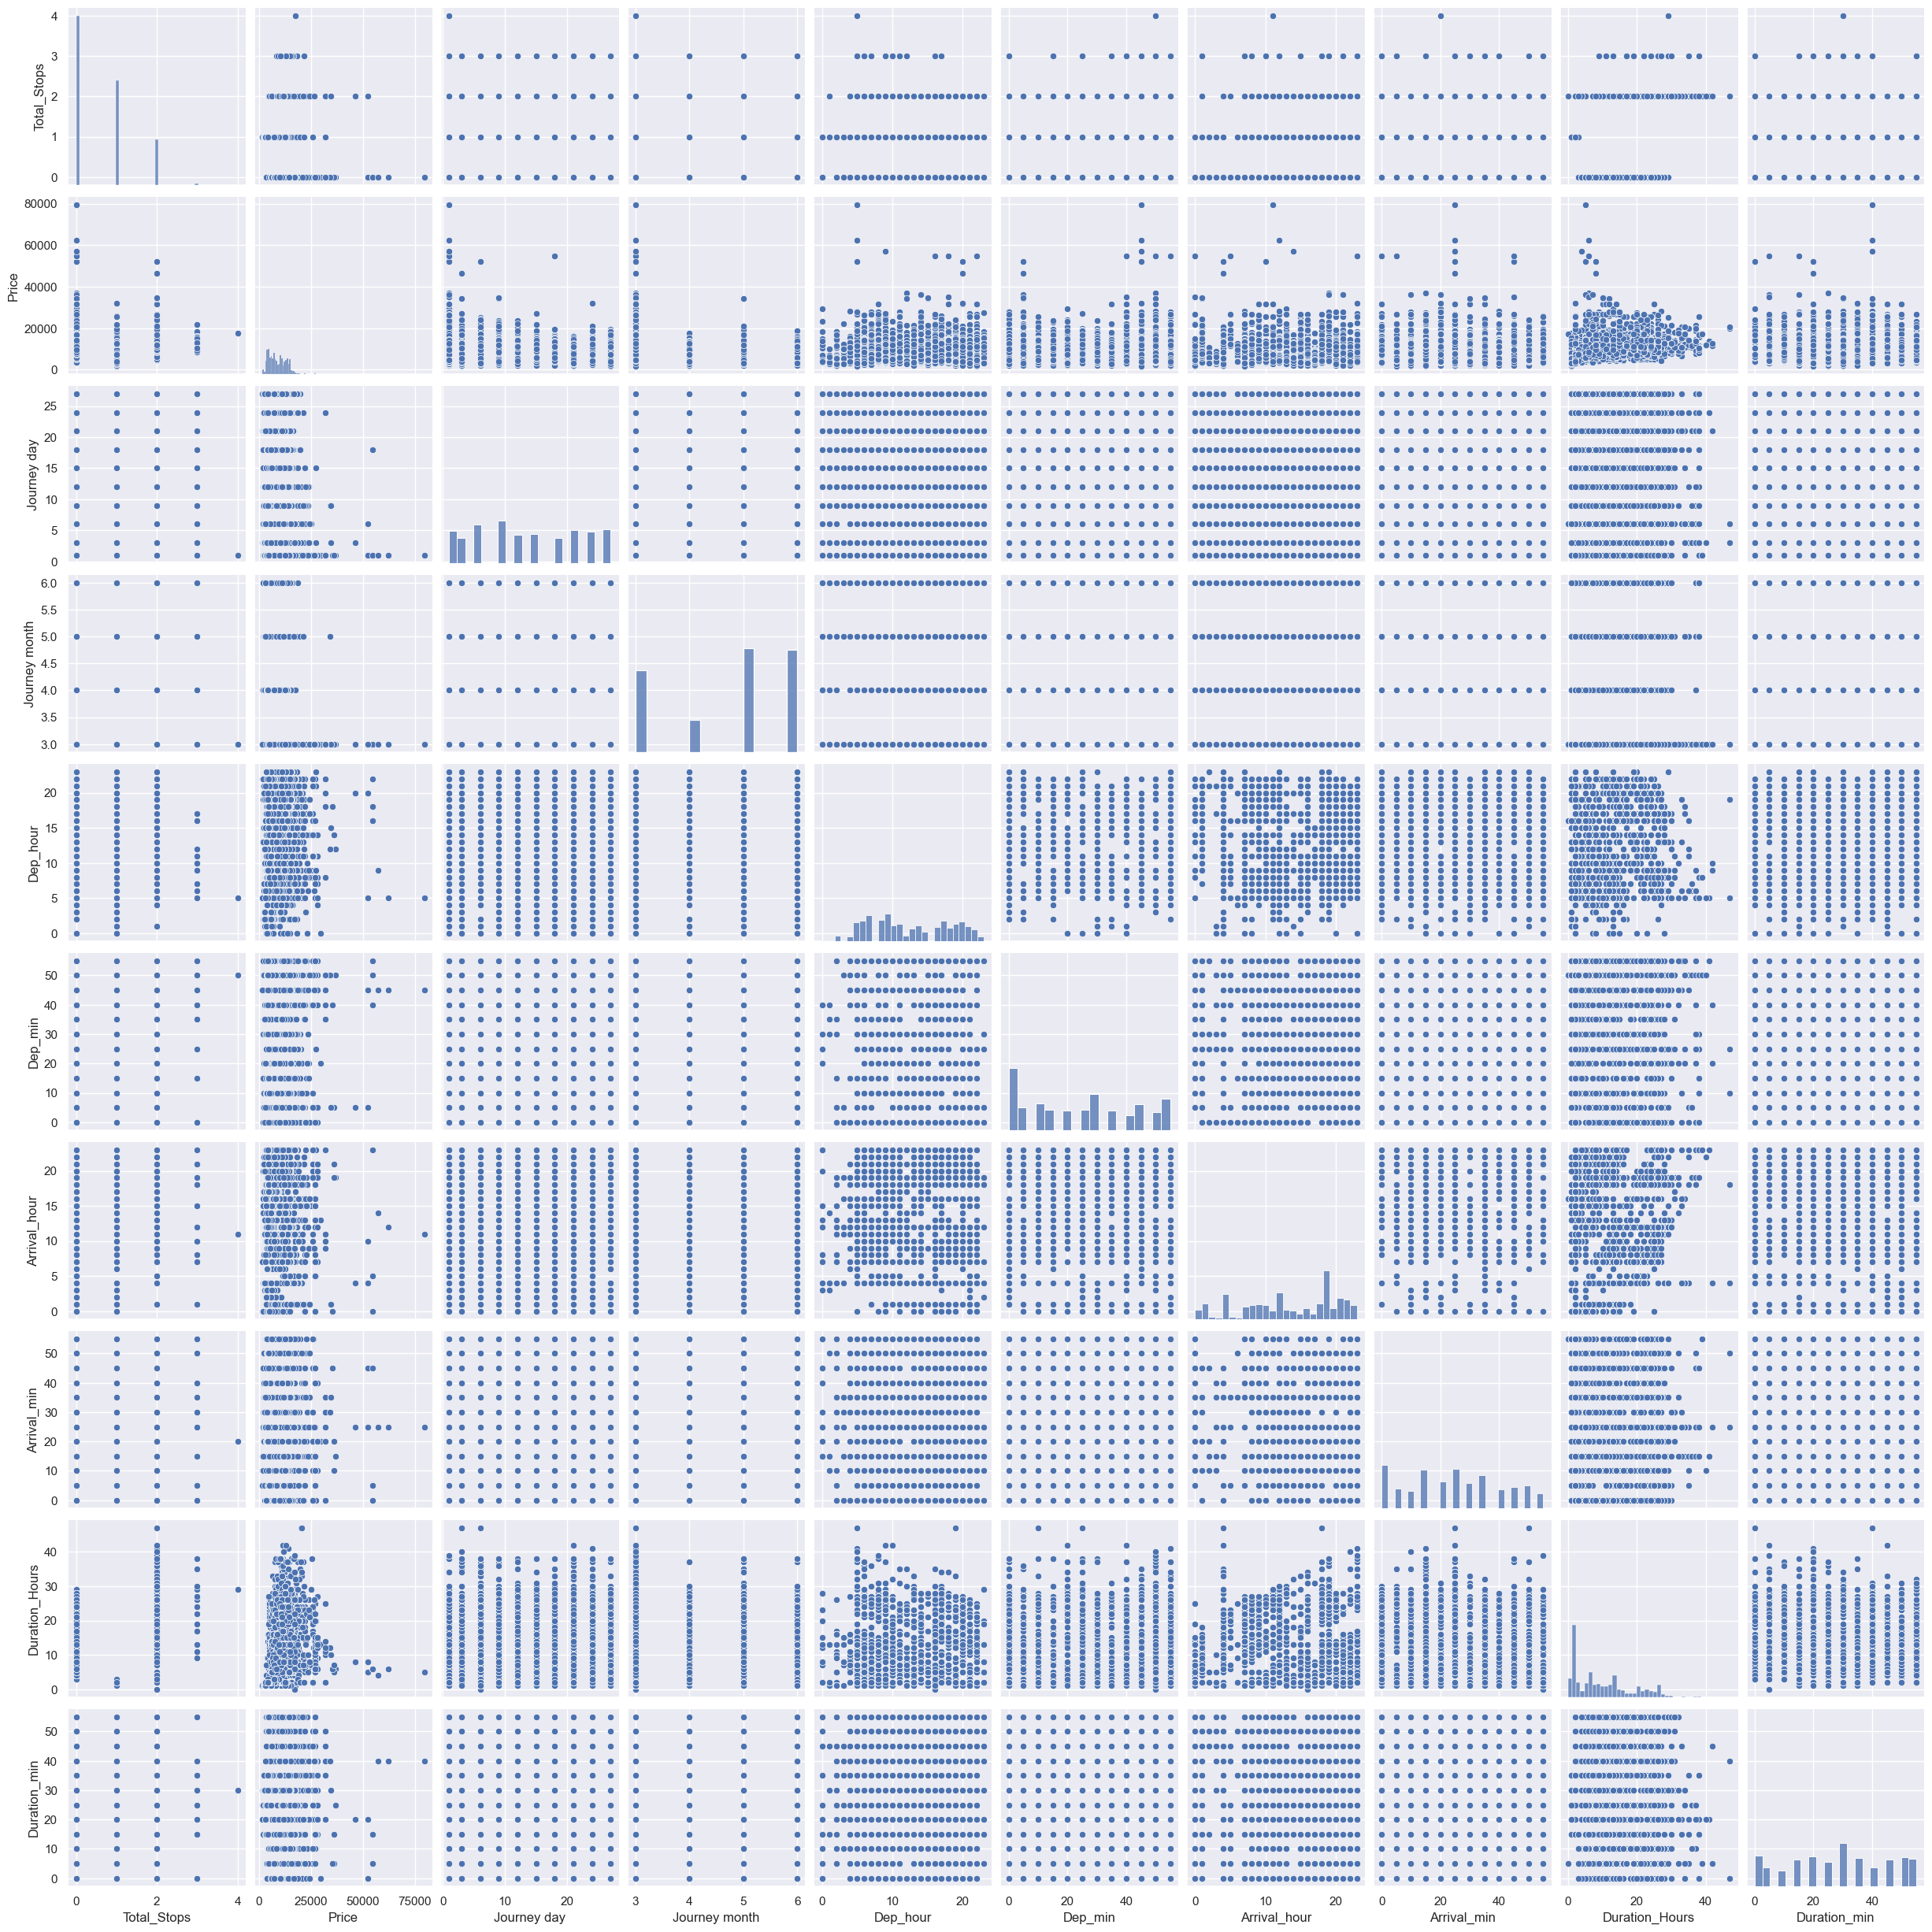

In [110]:
sns.pairplot(data_train)
plt.show()


In [63]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [64]:
print(selection.feature_importances_)

[9.44813431e-02 1.46098066e-01 5.35131101e-02 2.46635467e-02
 2.12690643e-02 2.76589447e-02 1.89415595e-02 1.52037930e-01
 1.74923945e-02 1.38918210e-02 1.55068390e-03 1.56377918e-02
 1.66287721e-01 7.03403772e-02 2.05223900e-02 9.12529708e-04
 1.88931137e-03 6.47160743e-05 5.07611560e-03 7.49987803e-05
 3.39783857e-04 1.26829618e-02 2.23337104e-02 1.81522817e-03
 3.80913762e-04 1.69342743e-02 1.51461635e-02 1.29605541e-02
 2.12768635e-02 1.66263201e-02 1.94092456e-03 3.61441028e-04
 2.47964451e-02]


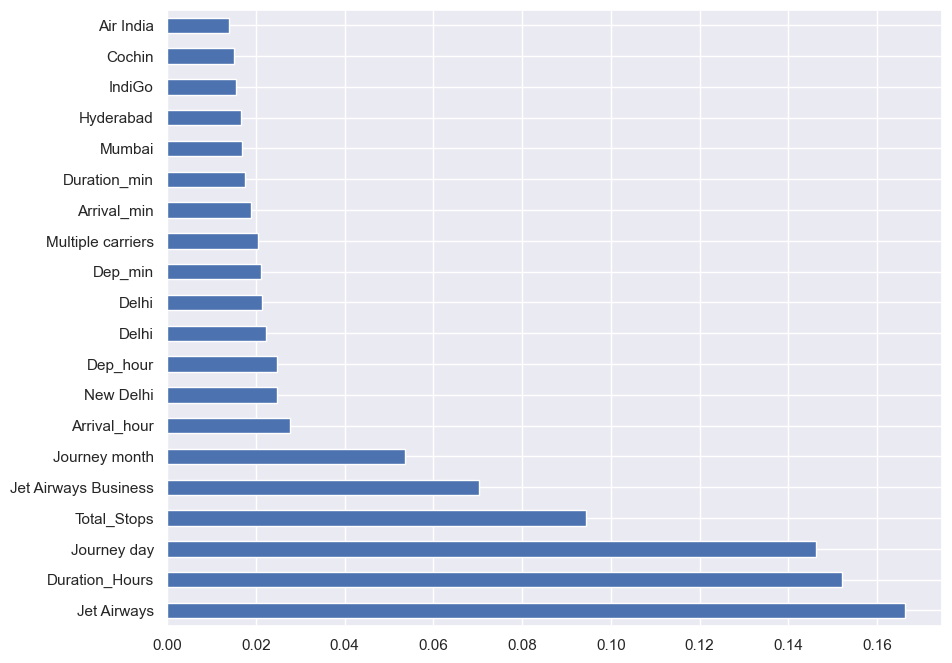

In [65]:
plt.figure(figsize=(10,8))
feature_importance = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind = 'barh')
plt.show()

The plot shows the top 20 features in descending order of importance. The most important features are listed at the top of the plot, and the least important features are listed at the bottom. The horizontal bars represent the relative importance of each feature, and the length of the bar indicates the importance score. The longer the bar, the more important the feature

Fitting model using Random Forest

Split dataset into train and test set in order to prediction w.r.t X_test

If needed do scaling of data

Scaling is not done in Random forest

Import model

Fit the data

Predict w.r.t X_test

In regression check RSME Score

Plot graph

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
reg_rfr = RandomForestRegressor()
reg_rfr.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
y_pred = reg_rfr.predict(X_test)

In [69]:
reg_rfr.score(X_train, y_train)

0.9531627653125899

In [70]:
reg_rfr.score(X_test, y_test)

0.7972085388042764

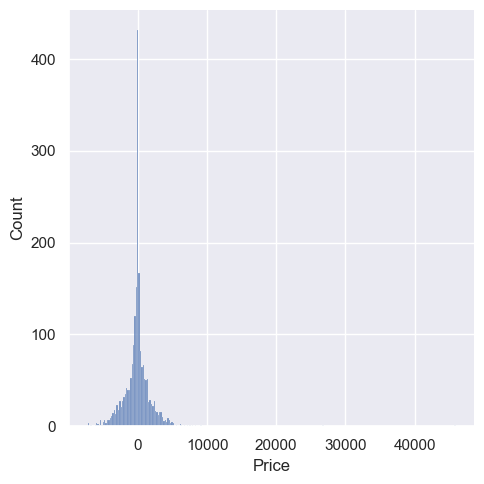

In [71]:
sns.displot(y_test-y_pred)
plt.show()

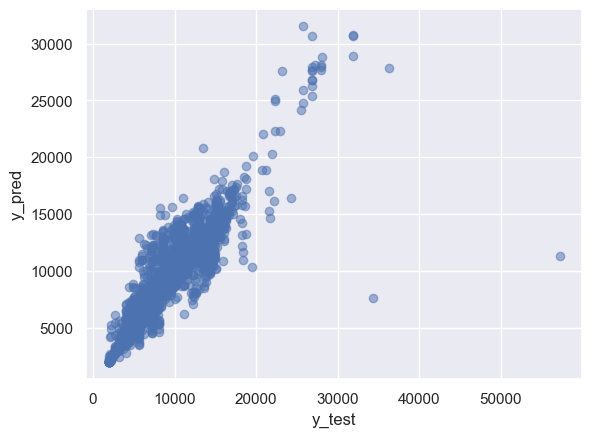

In [72]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [73]:
from sklearn import metrics
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_pred) )
print("Mean squared error: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error:  1178.328705684426
Mean squared error:  4372600.908361259
RMSE:  2091.0764951003725


In [74]:
metrics.r2_score(y_test,y_pred)

0.7972085388042764

In [76]:
from sklearn.model_selection import RandomizedSearchCV


In [77]:
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(start=5, stop=30, num=6)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}


In [79]:
rf_random = RandomizedSearchCV(estimator = reg_rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [80]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.4s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.1s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.8s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.8s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.5s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.4s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.2s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.4s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.2s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.7s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.3s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.4s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.4s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  12.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.1s
[CV] END max_depth=5, max_feat

D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.1s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.2s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  12.9s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  12.9s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.0s


D:\Jupyter\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [83]:
prediction = rf_random.predict(X_test)


C:\Users\Sidra Khan\AppData\Local\Temp\ipykernel_27320\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


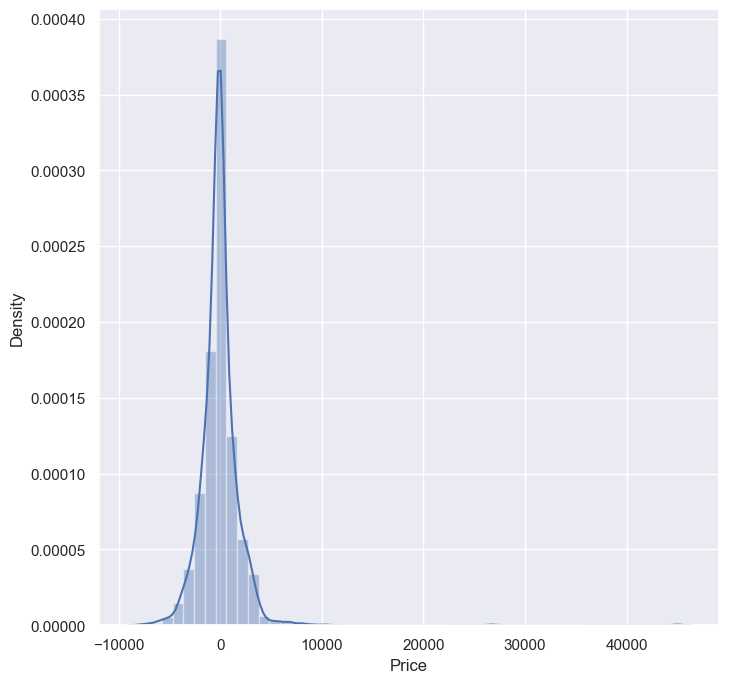

In [84]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

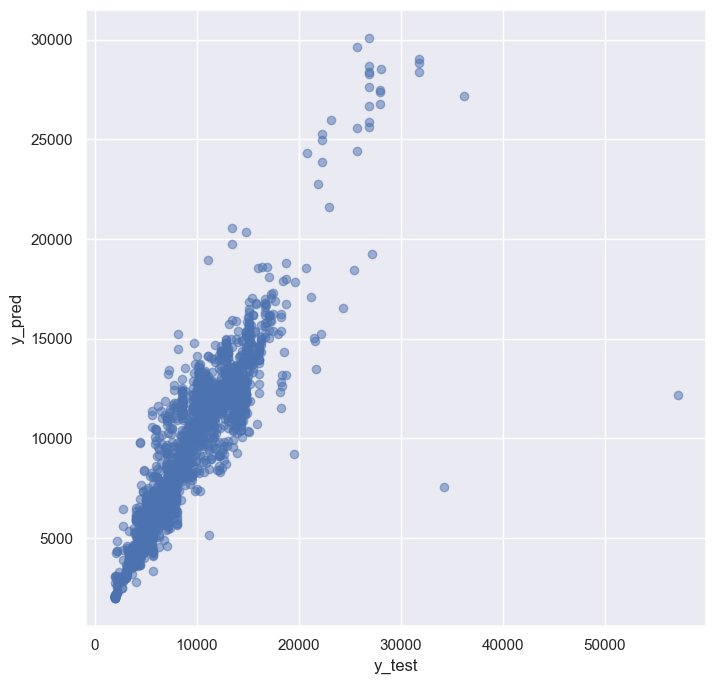

In [85]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.6809035698827
MSE: 4052122.5981761725
RMSE: 2012.9884744270576


In [91]:
# import the pickle module
import pickle

# train the model and save it to a file
model = RandomForestRegressor()
model.fit(X_train, y_train)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# load the saved model from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

In [95]:
y_prediction = loaded_model.predict(X_test)


In [96]:
metrics.r2_score(y_test, y_prediction)


0.7996928886936879